# Project 1 - Major League Baseball Analysis

In [1]:
#PROJECT SCOPE:

#Question 1 - How does the spending of each champion compare to the rest of the league?
#Objective 1 - Collect the salary spent for the world series champions by year
#Objective 2 - Collect the average salary spent for the losers by year
#Objective 3 - Summary DF and Graph comparing objective 1 and objective 2

#---------------------------------------------------------------------------------

#Question 2 - What are the guiding parameters for salary spent for winning teams?
#Objective 1 - Find the mean and STD for the salaries per year for the entire league
#Objective 2 - Calculate the number of STD's the winning salary deviates from the mean by year
#Objective 3 - Summary DF and Graph Objective 2

#----------------------------------------------------------------------------------

#Question 3 - Do the teams that spend the most, win the most?
#Objective 1 - Find the top 5 teams in salary spent per year
#Objective 2 - Find out how many times teams with a top 5 salary spent won the championship by year
#Objective 3 - Calculate the percentage of times a top 5 salary spent team won the championship

#----------------------------------------------------------------------------------

#Question 4 - Are there any commonalities between championship teams?
#Objective 1 - Summary DF of all World Series Champions statistics
#Objective 2 - Statisical Analysis on that Dataframe (mean of statistical categories)
#Objective 3 - Develop a statistical profile for a typical world series champion

In [2]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as tkr
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
from numpy import array

In [3]:
#CSV Read Ins from Kaggle Website

#Teams File - Convert to DataFrame
teams_filepath = "Resources/Teams.csv"
teams_df = pd.read_csv(teams_filepath)

#Salary File - COnvert to DataFrame
salary_csvpath = "Resources/Salaries.csv"
salary_df = pd.read_csv(salary_csvpath)

In [4]:
#Dataframe Cleanup - Preparing Dataframes to Analyze

#Teams CSV - Organize Columns, Drop Years Prior to 1985
teams_df = teams_df[["name", "teamID", "yearID", "WSWin", "G", "W", "L", "R", "AB", "H", "2B", "3B", "HR", "BB", "SO", "SB", "ER", "ERA", "CG", "E"]]
teams_df = teams_df.loc[teams_df["yearID"] > 1984]

#Salary CSV - Group Salary Dataframe by YearID & TeamID, retrieve sum
salary_year = salary_df.groupby(by=['yearID','teamID'])['salary'].sum()
salary_df = pd.DataFrame(salary_year)

In [5]:
#Get Stats Data for the Winners & Losers of the World Series
ws_winners_df = pd.DataFrame(teams_df.loc[(teams_df["WSWin"] == "Y")])
ws_losers_df = pd.DataFrame(teams_df.loc[(teams_df["WSWin"] == "N")])

In [6]:
#Merge Dataframes to get Stats Data and Salary Data in one dataframe
combined_allteams_df = pd.merge(teams_df, salary_df, on=["yearID", "teamID"])
combined_wswinners_df = pd.merge(ws_winners_df, salary_df, on=["yearID", "teamID"])
combined_wslosers_df = pd.merge(ws_losers_df, salary_df, on=["yearID", "teamID"])

In [7]:
#See Combined Dataframe
combined_allteams_df.head()

,name,teamID,yearID,WSWin,G,W,L,R,AB,H,...,3B,HR,BB,SO,SB,ER,ERA,CG,E,salary
0,Atlanta Braves,ATL,1985,N,162,66,96,632,5526,1359,...,28,126,553,849.0,72.0,678,4.19,9,159,14807000
1,Baltimore Orioles,BAL,1985,N,161,83,78,818,5517,1451,...,22,214,604,908.0,69.0,694,4.38,32,115,11560712
2,Boston Red Sox,BOS,1985,N,163,81,81,800,5720,1615,...,31,162,562,816.0,66.0,659,4.06,35,145,10897560
3,California Angels,CAL,1985,N,162,90,72,732,5442,1364,...,31,153,648,902.0,106.0,633,3.91,22,112,14427894
4,Chicago White Sox,CHA,1985,N,163,85,77,736,5470,1386,...,37,146,471,843.0,108.0,656,4.07,20,111,9846178


In [8]:
#See World Series Winners Dataframe
combined_wswinners_df.head()

,name,teamID,yearID,WSWin,G,W,L,R,AB,H,...,3B,HR,BB,SO,SB,ER,ERA,CG,E,salary
0,Kansas City Royals,KCA,1985,Y,162,91,71,687,5500,1384,...,49,154,473,840.0,128.0,567,3.49,27,127,9321179
1,New York Mets,NYN,1986,Y,162,108,54,783,5558,1462,...,31,148,631,968.0,118.0,513,3.11,27,138,15393714
2,Minnesota Twins,MIN,1987,Y,162,85,77,786,5441,1422,...,35,196,523,898.0,113.0,734,4.63,16,98,6397500
3,Los Angeles Dodgers,LAN,1988,Y,162,94,67,628,5431,1346,...,25,99,437,947.0,131.0,481,2.96,32,142,16850515
4,Oakland Athletics,OAK,1989,Y,162,99,63,712,5416,1414,...,25,127,562,855.0,157.0,497,3.09,17,129,15613070


In [9]:
#See World Series Losers Dataframe
combined_wslosers_df.head()

,name,teamID,yearID,WSWin,G,W,L,R,AB,H,...,3B,HR,BB,SO,SB,ER,ERA,CG,E,salary
0,Atlanta Braves,ATL,1985,N,162,66,96,632,5526,1359,...,28,126,553,849.0,72.0,678,4.19,9,159,14807000
1,Baltimore Orioles,BAL,1985,N,161,83,78,818,5517,1451,...,22,214,604,908.0,69.0,694,4.38,32,115,11560712
2,Boston Red Sox,BOS,1985,N,163,81,81,800,5720,1615,...,31,162,562,816.0,66.0,659,4.06,35,145,10897560
3,California Angels,CAL,1985,N,162,90,72,732,5442,1364,...,31,153,648,902.0,106.0,633,3.91,22,112,14427894
4,Chicago White Sox,CHA,1985,N,163,85,77,736,5470,1386,...,37,146,471,843.0,108.0,656,4.07,20,111,9846178


## Question 1 - How does the spending of each champion compare to the rest of the league?

Objective 1 - Collect the salary spent for the world series champions by year

Text(0, 0.5, 'Salary Amount (USD)')

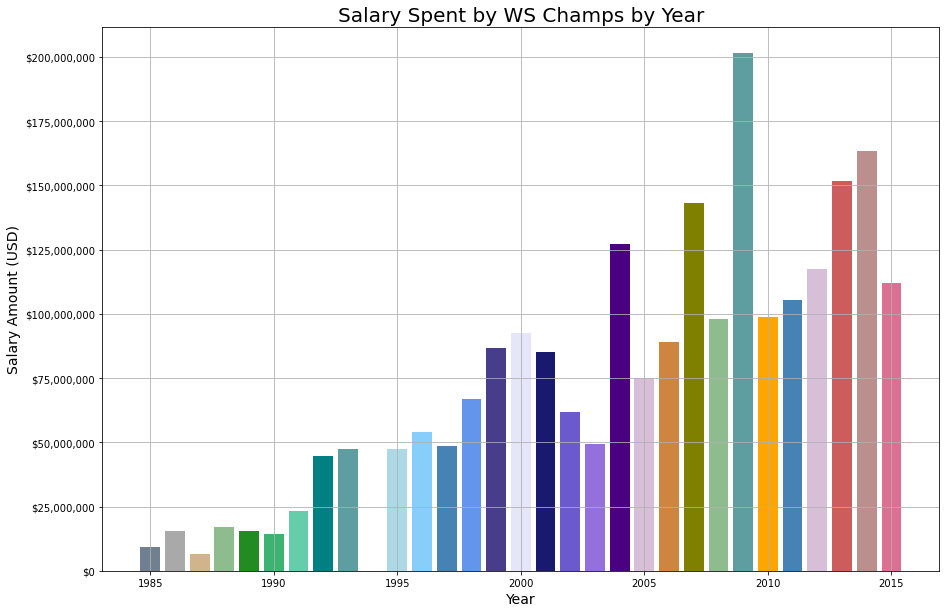

In [11]:
fig1, ax1 = plt.subplots(figsize=(15, 10))

ax1.grid(True)

my_colors = ['slategray', 'darkgray', 'tan', 'darkseagreen', 'forestgreen', 'mediumseagreen', 'mediumaquamarine', 'teal', 'cadetblue', 'lightblue', 'lightskyblue', 'steelblue', 'cornflowerblue', 'darkslateblue','lavender', 'midnightblue', 'slateblue', 'mediumpurple', 'indigo', 'thistle', 'peru', 'olive', 'darkseagreen', 'cadetblue', 'orange', 'steelblue', 'thistle', 'indianred', 'rosybrown', 'palevioletred' ]*5 # <-- this concatenates the list to itself 5 times.


# ax1.ticklabel_format(useOffset=False, style='plain', axis='y')
ax1.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax1.get_yaxis()


plt.bar(combined_wswinners_df['yearID'],combined_wswinners_df['salary'], color= my_colors)

plt.title("Salary Spent by WS Champs by Year",fontsize = 20)
plt.xlabel("Year",fontsize = 14)
plt.ylabel("Salary Amount (USD)",fontsize = 14)

# x_labels = ('KCA', 'NYN', 'MIN', 'LAN', 'OAK', 'CIN', 'MIN', 'TOR', 'TOR', 'ATL', 'NYA', 'FLO', 'NYA', 'NYA', 'NYA', 'ARI', 'ANA', 'FLO', 'BOS', 'CHA', 'SLN', 'BOS', 'PHI', 'NYA', 'SFN', 'SLN', 'SFN', 'BOS', 'SFN', 'KCA')
# fig1.xticklabels(x_labels)

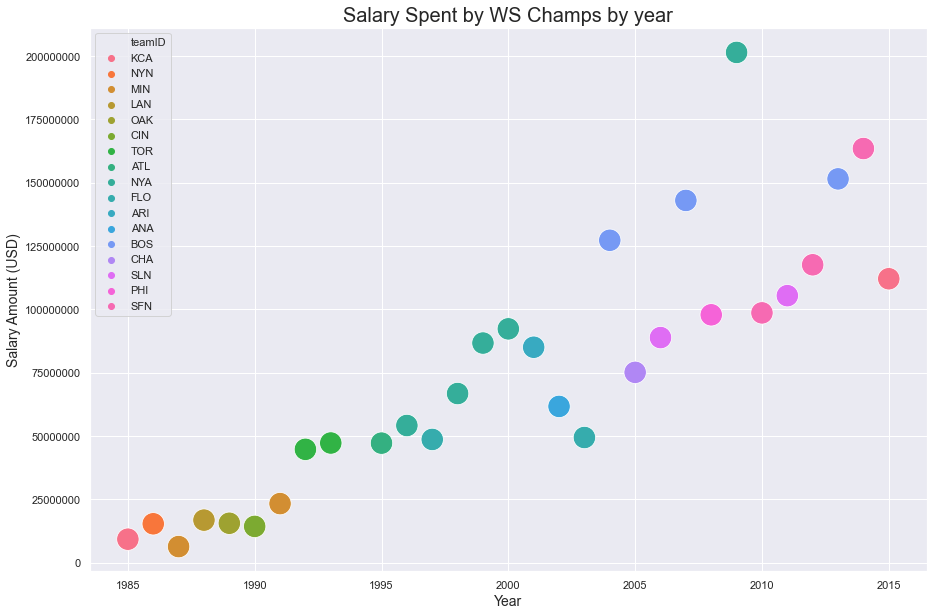

In [99]:
# combined_wswinners_df.plot(kind = 'scatter',x='yearID',y='salary',color ='teamID')

sns.set(rc={'figure.figsize':(15,10)})

sns.scatterplot(x='yearID',y='salary', data=combined_wswinners_df, hue='teamID',s=500)

plt.title("Salary Spent by WS Champs by year",fontsize = 20)
plt.xlabel("Year",fontsize = 14)
plt.ylabel("Salary Amount (USD)",fontsize = 14)

plt.ticklabel_format(style='plain', axis='y')

# plt.savefig("./resources/Salary Spent by WS Champs by year.png")

plt.show()


Objective 2 - Collect the average salary spent for the losers by year

In [12]:
losers_salary_df = combined_wslosers_df.groupby(['yearID'])[['salary']].mean().reset_index()
losers_salary_df.head(1)

,yearID,salary
0,1985,10105740.68


In [ ]:
# plt.rcParams.update({
#     "lines.color": "white",
#     "patch.edgecolor": "white",
#     "text.color": "black",
#     "axes.facecolor": "white",
#     "axes.edgecolor": "lightgray",
#     "axes.labelcolor": "white",
#     "xtick.color": "white",
#     "ytick.color": "white",
#     "grid.color": "lightgray",
#     "figure.facecolor": "black",
#     "figure.edgecolor": "black",
#     "savefig.facecolor": "black",
#     "savefig.edgecolor": "black"})

Text(0.5, 0, 'Salary Amount [USD]')

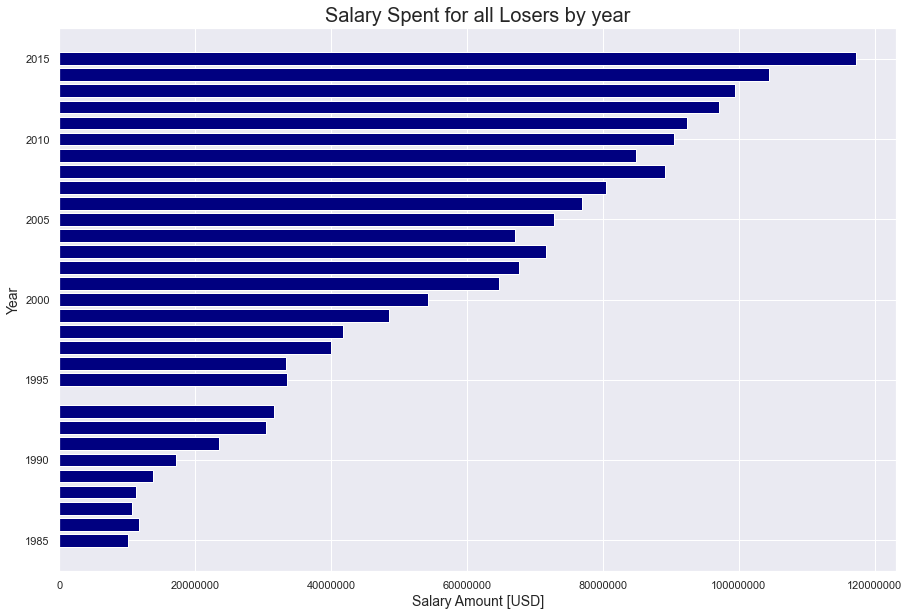

In [97]:
# plt.bar(losers_salary_df['yearID'], losers_salary_df['salary'])

plt.barh(losers_salary_df['yearID'], losers_salary_df['salary'], color= "navy")

plt.ticklabel_format(style='plain', axis='x')

plt.title("Salary Spent for all Losers by year",fontsize = 20)
plt.ylabel("Year",fontsize = 14)
plt.xlabel("Salary Amount [USD]",fontsize = 14)

# ax = sns.barplot(x="yearID", y="salary", data=losers_salary_df)

# plt.title("Salary Spent for all Losers by year",fontsize = 20)
# plt.xlabel("Year",fontsize = 14)
# plt.ylabel("Salary Amount [USD]",fontsize = 14)

# plt.ticklabel_format(style='plain', axis='y')

Objective 3 - Summary DF and Graph comparing objective 1 and objective 2

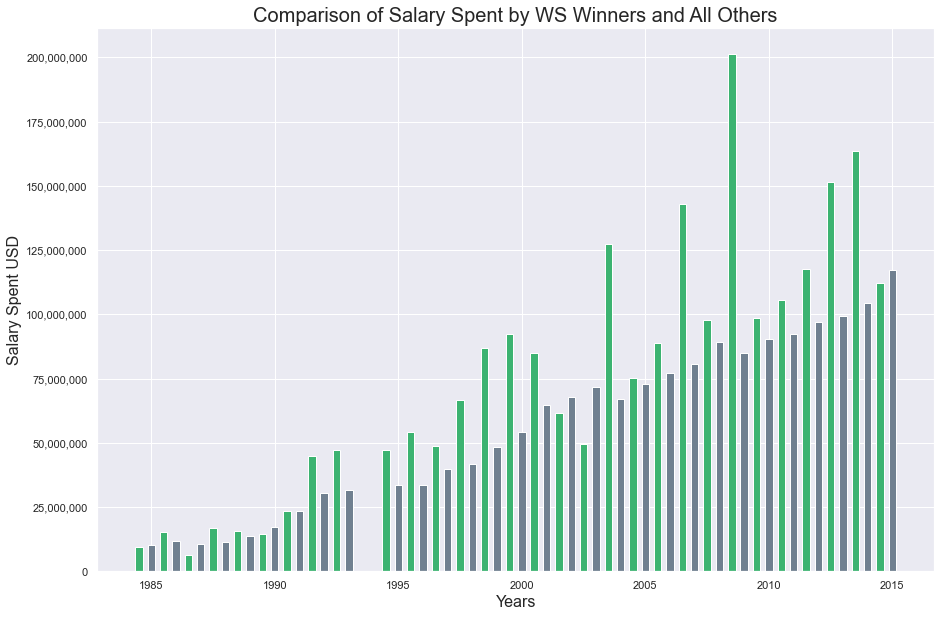

<Figure size 1080x72 with 0 Axes>

In [56]:
ax = plt.subplot()

# plt.ticklabel_format(style='plain', axis='y')

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax.bar(combined_wswinners_df['yearID']-0.5, combined_wswinners_df['salary'], width=0.3, color='mediumseagreen', align='center')
ax.bar(losers_salary_df['yearID'], losers_salary_df['salary'], width=0.3, color='slategrey', align='center')
plt.figure(figsize=(15, 1))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Salary Spent USD', fontsize= 16)
ax.set_title('Comparison of Salary Spent by WS Winners and All Others', fontsize= 20)
ax.set_xlabel('Years', fontsize= 16)



# ax.set_xticks('WS Winner')
# ax.set_xticklabels(labels)
# ax.legend()


# ax.autoscale(tight=False)

plt.show()





## Question 4 - Jared Work

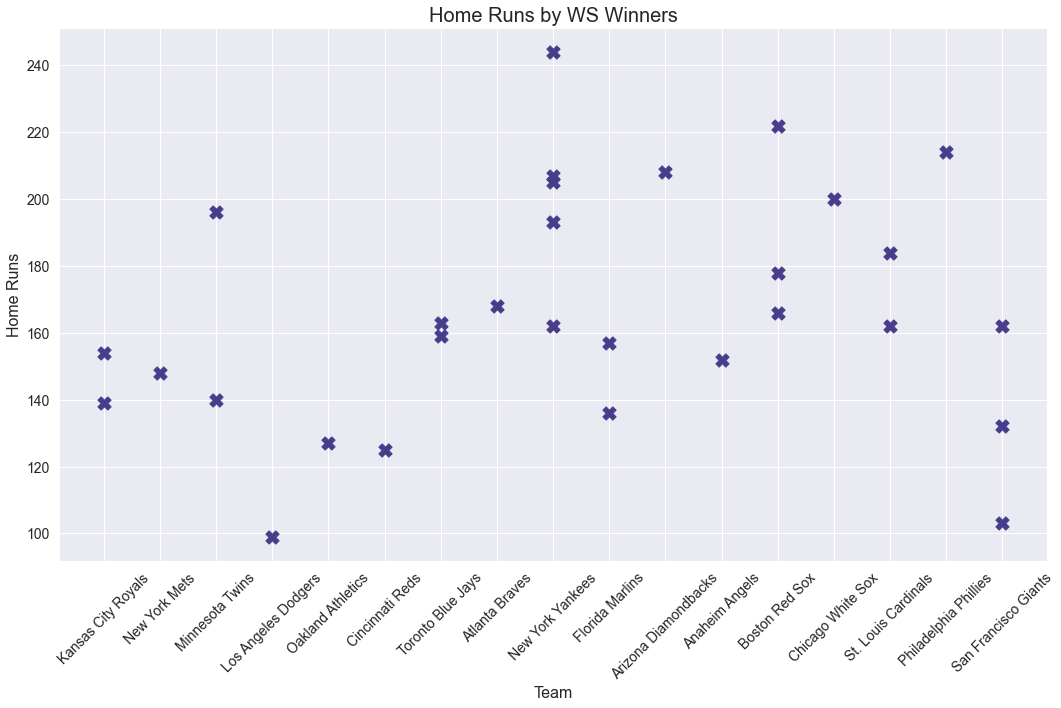

In [47]:
HR_plot = combined_wswinners_df.plot(kind="scatter", x="name", y="HR", grid=True, marker= 'X', s=175,
                          color="darkslateblue")
plt.xticks(rotation=45, size= 14)
plt.yticks(size= 14)

plt.grid(True) 

plt.title("Home Runs by WS Winners",fontsize = 20)
plt.ylabel("Home Runs",fontsize = 16)
plt.xlabel("Team",fontsize = 16)

plt.tight_layout()

HR_plot

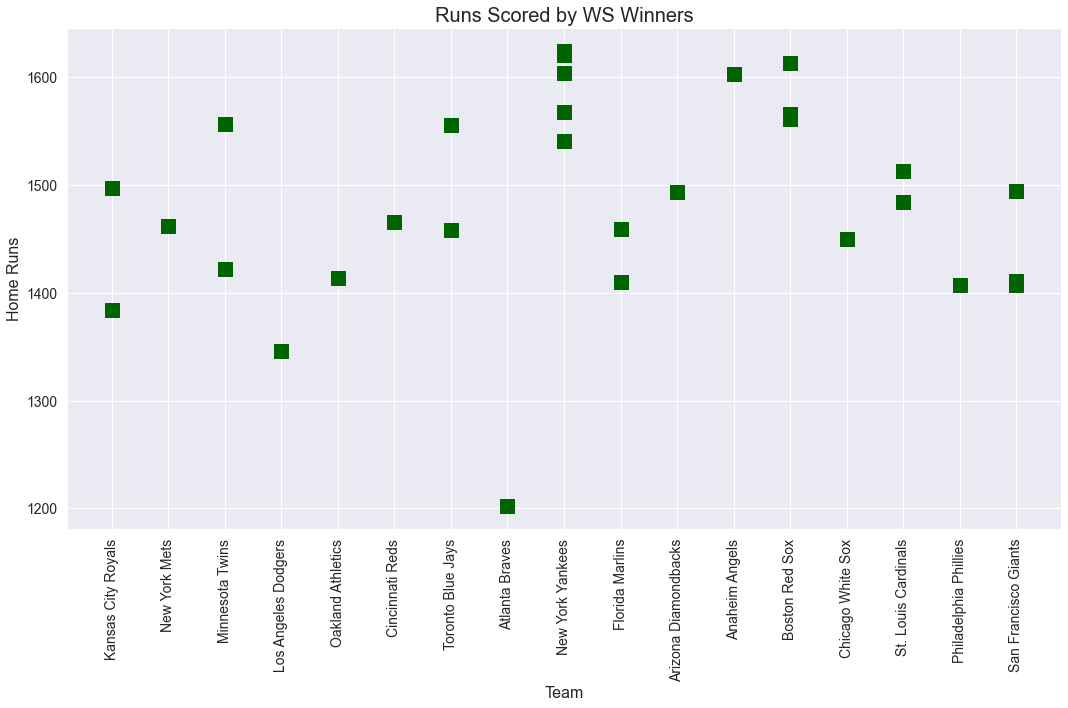

In [33]:
Hits_plot = combined_wswinners_df.plot(kind="scatter", x="name", y="H", grid=True, color="darkgreen", marker= 's', s=175)

plt.xticks(rotation=90, size= 14)
plt.yticks(size= 14)

plt.title("Runs Scored by WS Winners",fontsize = 20)
plt.ylabel("Home Runs",fontsize = 16)
plt.xlabel("Team",fontsize = 16)

plt.tight_layout()


Hits_plot

In [43]:
#Is this a duplicate?

# Runs_plot = combined_wswinners_df.plot(kind="scatter", x="name", y="R", grid=True, figsize=(20,5), title="Runs Scored by WS Winners",
#                           color="Blue")
# plt.xticks(rotation=90)
# Runs_plot

## Question 3 - Simon Work

In [18]:
#Get average Salary Spent per year for League Losers
avg_salary_losers = combined_wslosers_df.groupby(by=['yearID'])['salary'].mean()
avg_salary_losers_df = pd.DataFrame(avg_salary_losers)
avg_salary_losers_df.head()

,salary
yearID,
1985,10105740.68
1986,11698432.16
1987,10647115.00
1988,11344076.36
1989,13775305.64


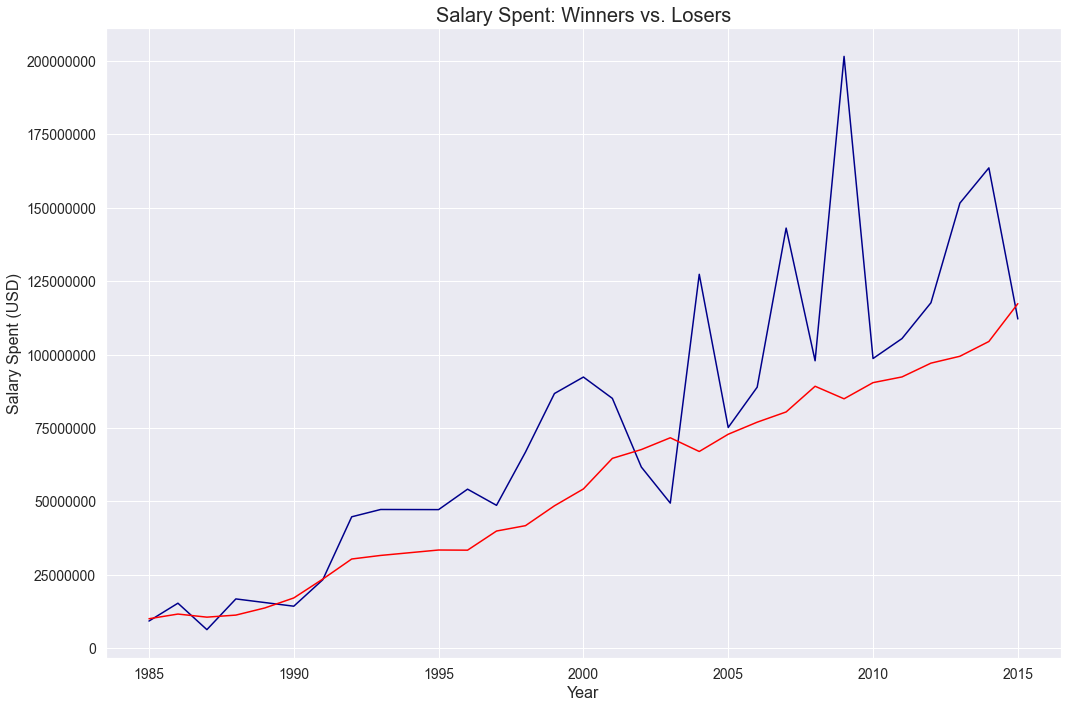

In [115]:
#Plot the Winning Teams Salary Spent against the Loser Teams Average Salary Spent (On Annual Basis)

plt.plot(combined_wswinners_df["yearID"], combined_wswinners_df["salary"], color="darkblue")
plt.plot(combined_wswinners_df["yearID"], avg_salary_losers_df["salary"], color="red")

plt.ticklabel_format(style='plain', axis='y')

plt.title("Salary Spent: Winners vs. Losers", fontsize= 20)
plt.xlabel("Year", fontsize= 16)
plt.ylabel("Salary Spent (USD)", fontsize= 16)

plt.xticks(size= 14)
plt.yticks(size= 14)


# ax1.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
# ax1.get_yaxis()


plt.tight_layout()


plt.show()

#### Question 2 - What are the guiding parameters for salary spent for winning teams?


##### Q2 Objective 1 - Find the mean and STD for the salaries per year for the entire league


In [20]:
combined_allteams_df

,name,teamID,yearID,WSWin,G,W,L,R,AB,H,...,3B,HR,BB,SO,SB,ER,ERA,CG,E,salary
0,Atlanta Braves,ATL,1985,N,162,66,96,632,5526,1359,...,28,126,553,849.0,72.0,678,4.19,9,159,14807000
1,Baltimore Orioles,BAL,1985,N,161,83,78,818,5517,1451,...,22,214,604,908.0,69.0,694,4.38,32,115,11560712
2,Boston Red Sox,BOS,1985,N,163,81,81,800,5720,1615,...,31,162,562,816.0,66.0,659,4.06,35,145,10897560
3,California Angels,CAL,1985,N,162,90,72,732,5442,1364,...,31,153,648,902.0,106.0,633,3.91,22,112,14427894
4,Chicago White Sox,CHA,1985,N,163,85,77,736,5470,1386,...,37,146,471,843.0,108.0,656,4.07,20,111,9846178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,Los Angeles Dodgers,LAN,2015,N,162,92,70,667,5385,1346,...,26,187,563,1258.0,59.0,553,3.44,6,75,215792000
884,San Francisco Giants,SFN,2015,N,162,84,78,696,5565,1486,...,39,136,457,1159.0,93.0,597,3.72,7,78,164701500
885,Arizona Diamondbacks,ARI,2015,N,162,79,83,720,5649,1494,...,48,154,490,1312.0,132.0,659,4.04,1,86,61834000
886,San Diego Padres,SDN,2015,N,162,74,88,650,5457,1324,...,36,148,426,1327.0,82.0,655,4.09,1,92,118441300


In [21]:
# convert to , currency
# combined_allteams_df['salary'] = combined_allteams_df.apply(lambda x: "{:,}".format(x['salary']), axis=1)
# # print(combined_allteams_df.head())
# # combined_allteams_df.describe()

In [22]:
salary_mean= combined_allteams_df.groupby(by=['yearID'])[['salary']].mean()
salary_mean= salary_mean.reset_index()

salary_mean.head()


,yearID,salary
0,1985,1.007557e+07
1,1986,1.184056e+07
2,1987,1.048367e+07
3,1988,1.155586e+07
4,1989,1.384599e+07


In [23]:
salary_std= combined_allteams_df.groupby(by=['yearID'])[['salary']].std()
salary_std= salary_std.reset_index()

salary_std.head()

,yearID,salary
0,1985,2.470845e+06
1,1986,3.186956e+06
2,1987,3.848337e+06
3,1988,3.386331e+06
4,1989,3.568844e+06


Text(0, 0.5, 'Salary Amount (USD)')

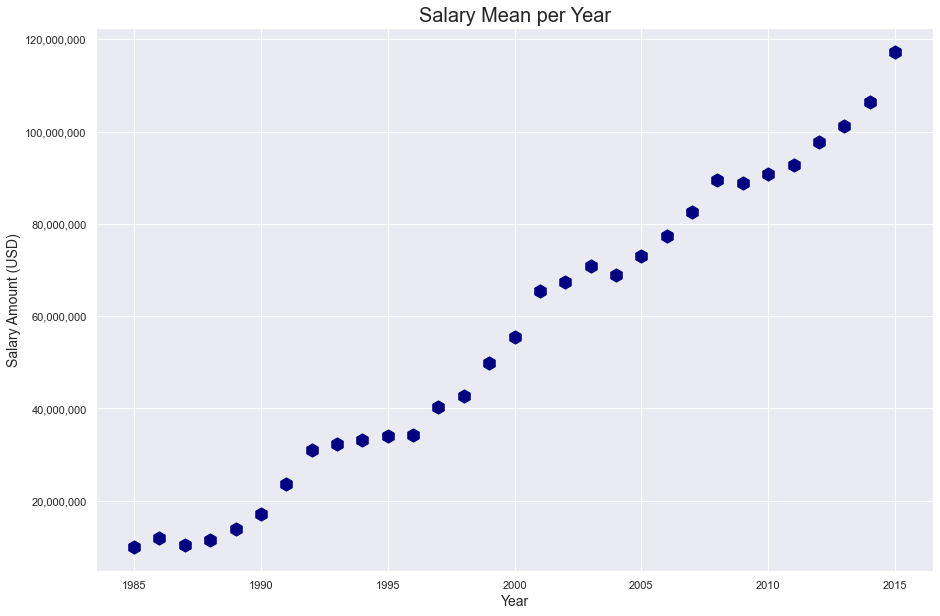

In [103]:
# plt.plot(salary_mean['yearID'], salary_mean['salary'])-> updated

fig1, ax1 = plt.subplots(figsize=(15, 10))

fmt = "{x:,.0f}"
tick = mpl.ticker.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick)


ax1.grid(True)
plt.scatter(salary_mean['yearID'],salary_mean['salary'], marker= "h", s=175, color="navy")

# plt.ticklabel_format(style='plain', axis='y')

plt.title("Salary Mean per Year",fontsize = 20)
plt.xlabel("Year",fontsize = 14)
plt.ylabel("Salary Amount (USD)",fontsize = 14)



Text(0, 0.5, 'Salary Amount')

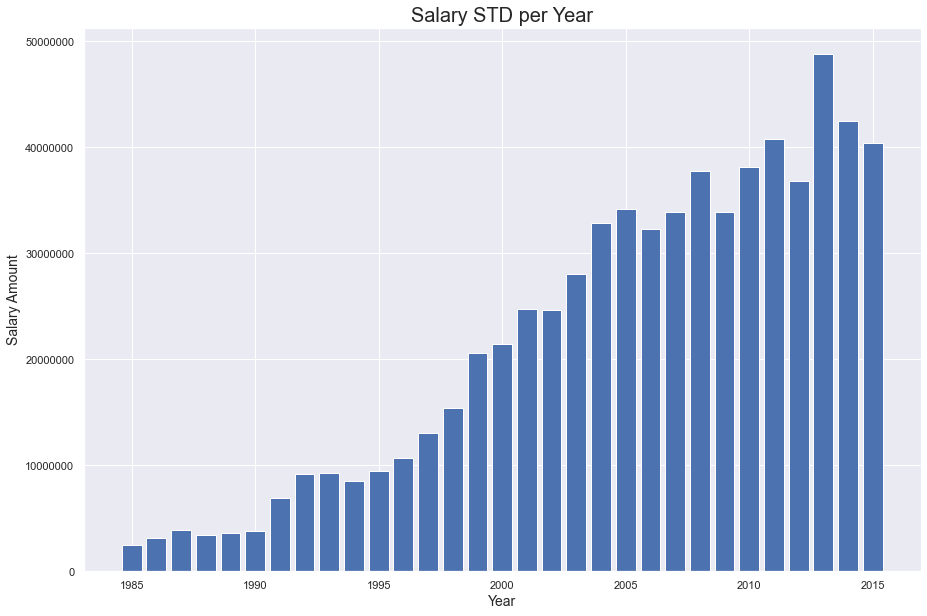

In [91]:
plt.bar(salary_std['yearID'], salary_std['salary'])

plt.ticklabel_format(style='plain', axis='y')

plt.title("Salary STD per Year",fontsize = 20)
plt.xlabel("Year",fontsize = 14)
plt.ylabel("Salary Amount",fontsize = 14)


#### Objective 2 - Calculate the number of STD's the winning salary deviates from the mean by year

In [26]:

#Objective 3 - Summary DF and Graph Objective 2